In [98]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

data=pd.read_csv('/Users/aidantang/Desktop/Gesture_recog/Feature_extract_data/feature_extracted_tdfd.csv')


n_estimators: 100, Validation Accuracy: 0.7419
n_estimators: 125, Validation Accuracy: 0.7402
n_estimators: 150, Validation Accuracy: 0.7385
n_estimators: 175, Validation Accuracy: 0.7419
n_estimators: 200, Validation Accuracy: 0.7419
n_estimators: 225, Validation Accuracy: 0.7385
n_estimators: 250, Validation Accuracy: 0.7402
n_estimators: 275, Validation Accuracy: 0.7385
n_estimators: 300, Validation Accuracy: 0.7436
n_estimators: 325, Validation Accuracy: 0.7385
n_estimators: 350, Validation Accuracy: 0.7368
n_estimators: 375, Validation Accuracy: 0.7385
n_estimators: 400, Validation Accuracy: 0.7385
n_estimators: 425, Validation Accuracy: 0.7419
n_estimators: 450, Validation Accuracy: 0.7419
n_estimators: 475, Validation Accuracy: 0.7419
n_estimators: 500, Validation Accuracy: 0.7436


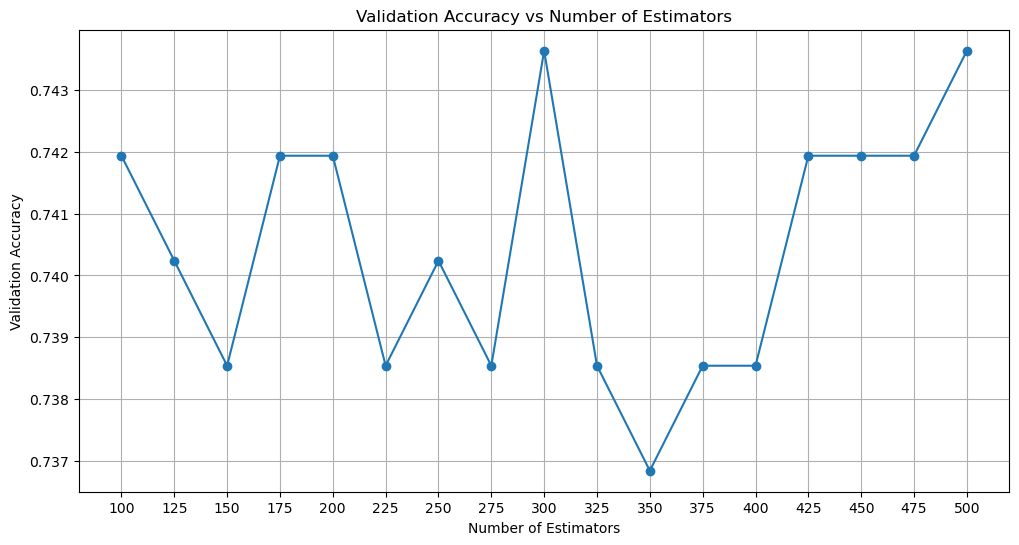


Best n_estimators: 300, Best Validation Accuracy: 0.7436


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Drop Rest data
data = data[data['Stimulus'] != 0]

# Data Splitting
train_data = data[data['Repetition'].isin([1, 2, 3])]
val_data = data[data['Repetition'].isin([4])]
test_data = data[data['Repetition'].isin([5, 6])]

X_train = train_data.drop(columns=['Stimulus', 'Repetition'])
y_train = train_data['Stimulus']
X_val = val_data.drop(columns=['Stimulus', 'Repetition'])
y_val = val_data['Stimulus']
X_test = test_data.drop(columns=['Stimulus', 'Repetition'])
y_test = test_data['Stimulus']

# Standardize Data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

# Hyperparameter Tuning for n_estimators
n_estimators_range = range(100, 501, 25)  # From 100 to 500 in steps of 25
val_accuracies = []

for n in n_estimators_range:
    rf_clf = RandomForestClassifier(n_estimators=n, max_depth=32, random_state=0)
    rf_clf.fit(X_train, y_train)
    
    y_val_pred = rf_clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)
    print(f"n_estimators: {n}, Validation Accuracy: {val_accuracy:.4f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, val_accuracies, marker='o', linestyle='-')
plt.title('Validation Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.xticks(n_estimators_range)
plt.grid(True)
plt.show()

# Best n_estimators
best_n_estimators = n_estimators_range[np.argmax(val_accuracies)]
best_accuracy = max(val_accuracies)
print(f"\nBest n_estimators: {best_n_estimators}, Best Validation Accuracy: {best_accuracy:.4f}")


max_depth: 1, Validation Accuracy: 0.2733
max_depth: 2, Validation Accuracy: 0.3871
max_depth: 3, Validation Accuracy: 0.5161
max_depth: 4, Validation Accuracy: 0.5976
max_depth: 5, Validation Accuracy: 0.6316
max_depth: 6, Validation Accuracy: 0.6723
max_depth: 7, Validation Accuracy: 0.7165
max_depth: 8, Validation Accuracy: 0.7385
max_depth: 9, Validation Accuracy: 0.7351
max_depth: 10, Validation Accuracy: 0.7436
max_depth: 11, Validation Accuracy: 0.7402
max_depth: 12, Validation Accuracy: 0.7487
max_depth: 13, Validation Accuracy: 0.7453
max_depth: 14, Validation Accuracy: 0.7470
max_depth: 15, Validation Accuracy: 0.7470
max_depth: 16, Validation Accuracy: 0.7436
max_depth: 17, Validation Accuracy: 0.7402
max_depth: 18, Validation Accuracy: 0.7402
max_depth: 19, Validation Accuracy: 0.7419
max_depth: 20, Validation Accuracy: 0.7402
max_depth: 21, Validation Accuracy: 0.7419
max_depth: 22, Validation Accuracy: 0.7436
max_depth: 23, Validation Accuracy: 0.7436
max_depth: 24, Valid

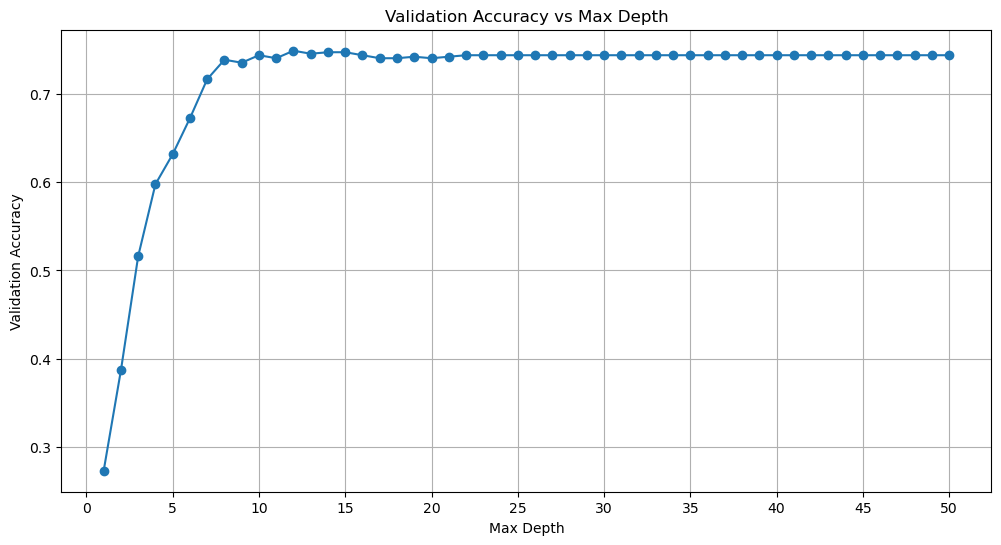


Best max_depth: 12, Best Validation Accuracy: 0.7487


In [100]:
### Hyperparameter Tuning for `max_depth`
max_depth_range = range(1, 51)  # From 1 to 50
val_accuracies_depth = []

for depth in max_depth_range:
    rf_clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=depth, random_state=0)
    rf_clf.fit(X_train, y_train)
    
    y_val_pred = rf_clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies_depth.append(val_accuracy)
    print(f"max_depth: {depth}, Validation Accuracy: {val_accuracy:.4f}")

# Plot Validation Accuracy for `max_depth`
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, val_accuracies_depth, marker='o', linestyle='-')
plt.title('Validation Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Validation Accuracy')
plt.xticks(range(0, 51, 5))
plt.grid(True)
plt.show()

# Best max_depth
best_max_depth = max_depth_range[np.argmax(val_accuracies_depth)]
best_accuracy_depth = max(val_accuracies_depth)
print(f"\nBest max_depth: {best_max_depth}, Best Validation Accuracy: {best_accuracy_depth:.4f}")


In [103]:
# Final Training with Best Hyperparameters
final_rf_clf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    random_state=0
)
final_rf_clf.fit(X_train, y_train)

# ✅ Validate the Final Model
y_val_pred = final_rf_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("🔍 Final Validation Accuracy:", val_accuracy)
print(" Final Validation Classification Report:", classification_report(y_val, y_val_pred))

# ✅ Test the Final Model
y_pred = final_rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(" Final Test Accuracy:", test_accuracy)
print("Final Test Classification Report:", classification_report(y_test, y_pred))

🔍 Final Validation Accuracy: 0.7487266553480475
 Final Validation Classification Report:               precision    recall  f1-score   support

           1       0.76      0.80      0.78        65
           2       0.90      0.67      0.77        54
           3       0.87      0.97      0.92        40
           4       0.69      0.93      0.79        40
           5       0.85      0.68      0.75        34
           6       1.00      0.95      0.98        22
           7       0.69      0.90      0.78        39
           8       0.62      0.33      0.43        24
           9       0.75      0.60      0.67        35
          10       0.68      0.86      0.76        37
          11       0.56      0.76      0.64        25
          12       0.60      0.16      0.26        37
          13       0.41      0.87      0.56        23
          14       0.86      0.78      0.82        23
          15       1.00      1.00      1.00        20
          16       0.83      0.81      0.82   

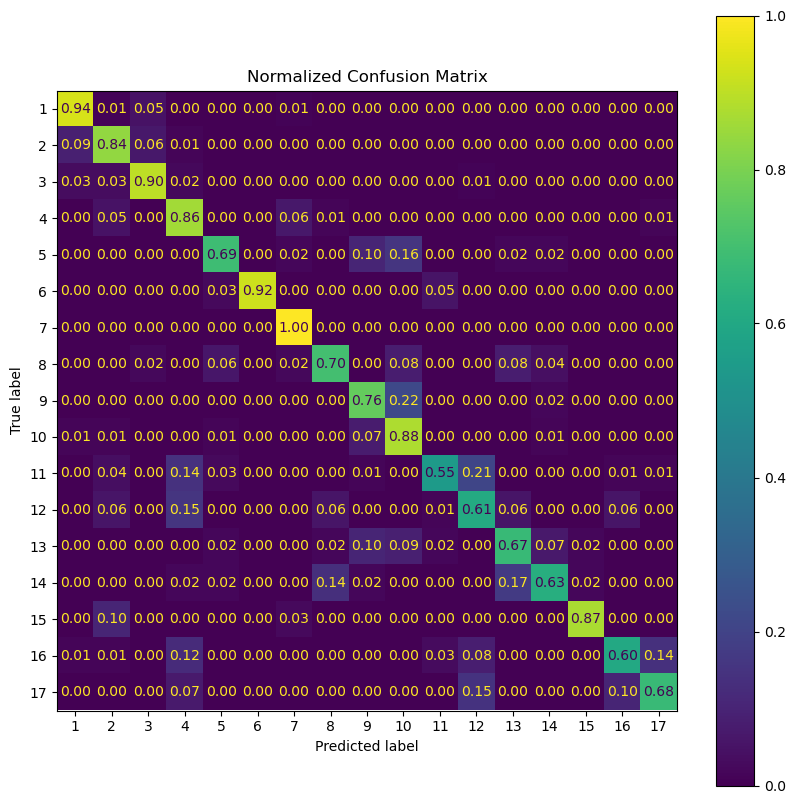

Accuracy: 0.7843


In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Extract unique stimulus labels from the test dataset
unique_labels = sorted(y_test.unique())

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Plot Confusion Matrix with Correct Labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='viridis', values_format=".2f", ax=ax)
plt.title('Normalized Confusion Matrix')
plt.show()

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
